In [12]:
from flyanalysis import braidz
from flyanalysis.processing import extract_stimulus_centered_data
from flyanalysis.plotting import plot_mean_and_std
from flyanalysis import filtering
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = "/home/buchsbaum/mnt/DATA/Experiments/20240822_105738.braidz"
df, csvs = braidz.read_braidz(filename)

Reading /home/buchsbaum/mnt/DATA/Experiments/20240822_105738.braidz using pyarrow


In [19]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{262, 316, 348, 353, 366, 388, 395, 2515, 3428, 12496, 12518}

In [3]:
data = extract_stimulus_centered_data(df, csvs["stim"])

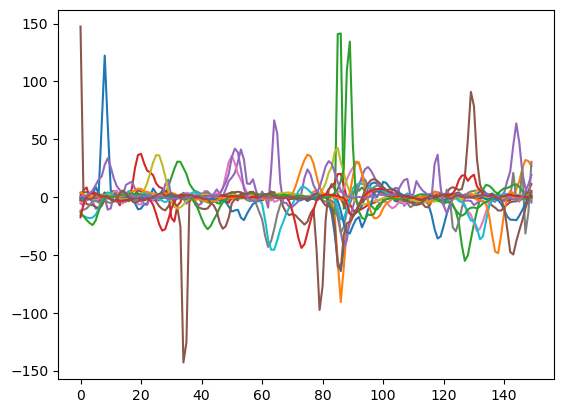

In [7]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

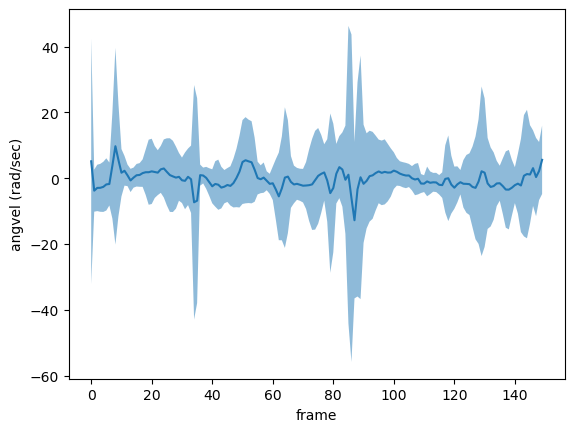

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

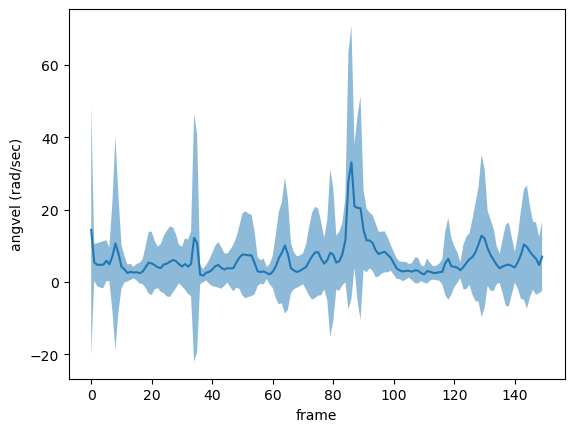

In [8]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()